In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class FoodItem:
  def __init__(self, mean, sd):
    self.mean = mean
    self.sd = sd
  def getSatisfaction(self):
    satisfaction = np.random.normal(self.mean, self.sd)
    self.n += 1
    self.totalSatisfaction += satisfaction
    return satisfaction

In [ ]:
class ThompsonSampling(FoodItem):
  def __init__(self, mean, sd):
    self.prior_mean = 0
    self.prior_sd = 100
    self.posterior_mean = self.prior_mean
    self.posterior_sd = self.prior_sd
    self.n = 0
    self.totalSatisfaction = 0

    super().__init__(mean, sd)
  
  def getMeanFromCurrentDistribution(self):
    return np.random.normal(self.posterior_mean, self.posterior_sd)

  def updateDistribution(self):
    self.posterior_sd = np.sqrt(1 / (1/self.prior_sd**2 + self.n/self.sd**2))
    self.posterior_mean = self.posterior_sd**2 * ((self.prior_mean / self.prior_sd**2) + (self.totalSatisfaction / self.sd**2))

In [ ]:
def drawCurrentDistribution(F, i):
  for food in F:
    samples = np.random.normal(food.posterior_mean, food.posterior_sd, 10000)
    sns.kdeplot(samples, shade = True)
  plt.title(f"Iteration Number: {i+1}")
  plt.xlabel("Satisfaction")
  plt.xlim(-10, 10)

  plt.legend([f"Mean = {f.mean}"] for f in F)
  plt.show()

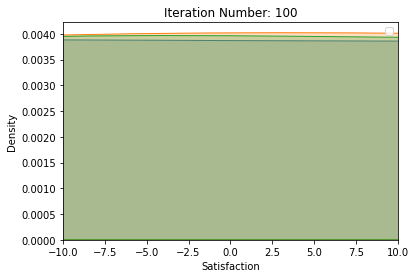

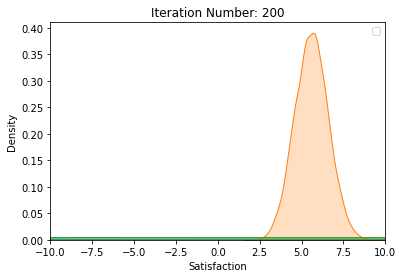

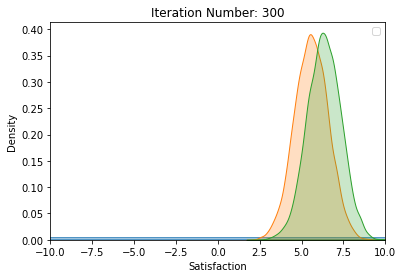

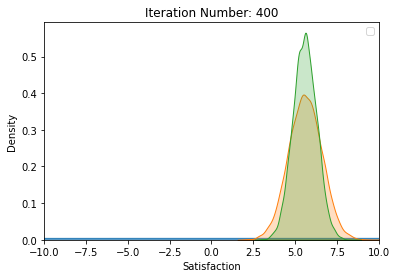

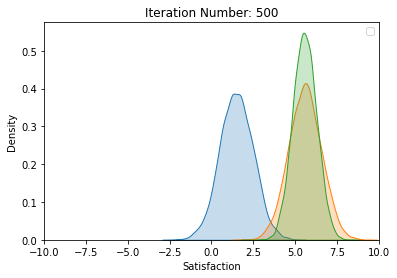

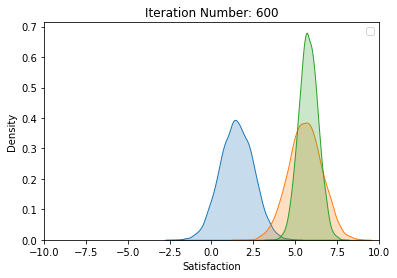

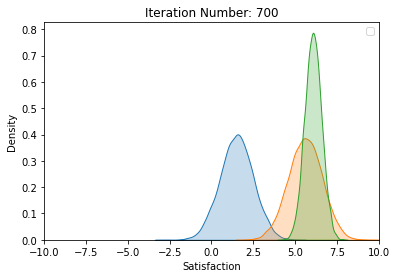

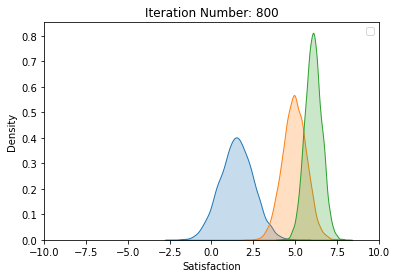

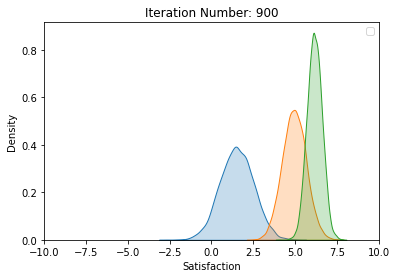

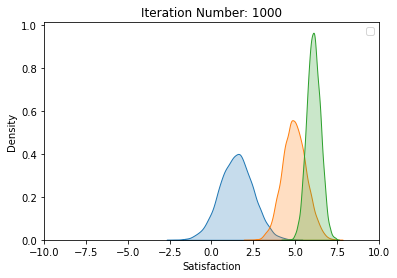

In [ ]:
numberOfFoodItems = 3
mean_spacing = 2
F = [ThompsonSampling(i*mean_spacing, 1) for i in range(1, numberOfFoodItems + 1)]

# for 1000 iterations:
for i in range(1000):
  if (i+1)%100 == 0:
    drawCurrentDistribution(F, i)

    # get posterior samples
    posterior_samples = [f.getMeanFromCurrentDistribution() for f in F]

    largest_index = posterior_samples.index(max(posterior_samples))
    s = F[largest_index].getSatisfaction()
    F[largest_index].updateDistribution()